<a href="https://colab.research.google.com/github/mukeshsablani3126/MukeshTheDataAnalyst2.github.io/blob/main/OOH_SystemFile_Mukesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1.Data Understanding and Exploration-**

Before diving into cleaning, I need to understand the dataset:

 * Load and inspect the data: Understand the structure, column names, data
   types, and row counts.
 *  Initial checks:

Check for null values.

1.   Check for duplicate records.
2.   Inspect timestamp formats.
3.   Identify inconsistent or invalid entries.









In [ ]:
import pandas as pd


In [ ]:

# Load Data
df= pd.read_csv('/content/drive/MyDrive/Case Study OoH_system_Activity/OOH_SystemActivity.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173002 entries, 0 to 173001
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   transactionNumber  173002 non-null  int64 
 1   trade_timestamp    173002 non-null  object
 2   trader_id          172999 non-null  object
 3   city               173002 non-null  object
 4   country            173002 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.6+ MB


In [ ]:
#preview data
df.head()

,transactionNumber,trade_timestamp,trader_id,city,country
0,32051506,02/20/2023 00:38:04,"Jones,J",Texas,USA
1,14621025,15/07/2023,20472,Dubai,UAE
2,14823322,06/07/2023,20472,Dubai,UAE
3,14827051,06/06/2023,20472,Dubai,UAE
4,14978933,09/09/2023,20472,Dubai,UAE


In [ ]:
df.shape

(173002, 5)

In [ ]:
# Check for duplicates
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 4513


In [ ]:
# Check for null values
print("Null Values:")
print(df.isnull().sum())

Null Values:
transactionNumber    0
trade_timestamp      0
trader_id            3
city                 0
country              0
dtype: int64


In [ ]:
# Unique values per column
print("Unique Values:")
print(df.nunique())

Unique Values:
transactionNumber    167968
trade_timestamp      167875
trader_id                16
city                      6
country                   4
dtype: int64


**Step 2.Data Cleaning-**

A.  Handle Missing Values

*  Check the trader_id column, as it’s crucial for analysis.
   * If trader_id is missing, decide to either drop or impute based on the count and criticality.

* Handle missing timestamps:
   * If trade_timestamp is null, drop or flag these rows for review.

In [ ]:
# Drop rows with missing trader_id
df = df.dropna(subset=['trader_id'])

# Flag rows with missing timestamps
df.loc[:, 'trade_timestamp_missing'] = df['trade_timestamp'].isnull()

# Drop or impute missing timestamps
df = df.dropna(subset=['trade_timestamp'])


B. Handle Duplicate Records

*  Remove duplicate rows to ensure clean analysis.




In [ ]:
# Remove duplicates
df = df.drop_duplicates()
print("Duplicates Removed")


Duplicates Removed


C. Standardize and Validate trade_timestamp


*   Convert trade_timestamp to a proper datetime format.
*   Flag invalid timestamps (e.g., placeholder 00:00:00).


In [ ]:
from datetime import datetime

# Convert to datetime, invalid entries set to NaT
df['trade_timestamp'] = pd.to_datetime(df['trade_timestamp'], errors='coerce')

# Filter invalid timestamps
invalid_times = df['trade_timestamp'].isnull().sum()
print("Invalid Timestamps Found:", invalid_times)

# Drop rows with invalid timestamps
df = df.dropna(subset=['trade_timestamp'])


Invalid Timestamps Found: 102040


In [ ]:
df.head()

,transactionNumber,trade_timestamp,trader_id,city,country,trade_timestamp_missing
0,32051506,2023-02-20 00:38:04,"Jones,J",Texas,USA,False
33,16589809,2023-12-05 05:08:49,D2918,Dusseldorf,Germany,False
40,16744986,2023-12-02 08:04:31,D2918,Dusseldorf,Germany,False
43,16763629,2023-03-04 23:04:45,20472,Dusseldorf,Germany,False
48,17361306,2023-10-10 12:16:23,A2141,Dusseldorf,Germany,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66446 entries, 0 to 168487
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transactionNumber        66446 non-null  int64         
 1   trade_timestamp          66446 non-null  datetime64[ns]
 2   trader_id                66446 non-null  object        
 3   city                     66446 non-null  object        
 4   country                  66446 non-null  object        
 5   trade_timestamp_missing  66446 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(3)
memory usage: 3.1+ MB


D. Extract Date and Time Components

*   Create separate trade_date and trade_time columns for easier analysis.




In [ ]:
# Extract date and time
df['trade_date'] = df['trade_timestamp'].dt.date
df['trade_time'] = df['trade_timestamp'].dt.time

# Preview cleaned data
df.head()


,transactionNumber,trade_timestamp,trader_id,city,country,trade_timestamp_missing,trade_date,trade_time
0,32051506,2023-02-20 00:38:04,"Jones,J",Texas,USA,False,2023-02-20,00:38:04
33,16589809,2023-12-05 05:08:49,D2918,Dusseldorf,Germany,False,2023-12-05,05:08:49
40,16744986,2023-12-02 08:04:31,D2918,Dusseldorf,Germany,False,2023-12-02,08:04:31
43,16763629,2023-03-04 23:04:45,20472,Dusseldorf,Germany,False,2023-03-04,23:04:45
48,17361306,2023-10-10 12:16:23,A2141,Dusseldorf,Germany,False,2023-10-10,12:16:23


In [ ]:
df.head()

,transactionNumber,trade_timestamp,trader_id,city,country,trade_timestamp_missing
0,32051506,2023-02-20 00:38:04,"Jones,J",Texas,USA,False
33,16589809,2023-12-05 05:08:49,D2918,Dusseldorf,Germany,False
40,16744986,2023-12-02 08:04:31,D2918,Dusseldorf,Germany,False
43,16763629,2023-03-04 23:04:45,20472,Dusseldorf,Germany,False
48,17361306,2023-10-10 12:16:23,A2141,Dusseldorf,Germany,False


**Step 3. Define Working Hours and Flag Unusual Activities-**


*   Define working hours as 10 AM to 7 PM (customizable).
*   Flag activities outside this range as “unusual.”


In [ ]:
from datetime import time

# Define permissible working hours
start_time = time(10, 0, 0)  # 10.00 AM
end_time = time(19, 0, 0) # 7.00 PM

# Flag activities outside working hours
df['outside_working_hours'] = ~df['trade_time'].between(start_time, end_time)

# Filter for unusual activities
unusual_activities = df[df['outside_working_hours']]

print("Unusual Activities:")
unusual_activities.head()

Unusual Activities:


,transactionNumber,trade_timestamp,trader_id,city,country,trade_timestamp_missing,trade_date,trade_time,outside_working_hours
0,32051506,2023-02-20 00:38:04,"Jones,J",Texas,USA,False,2023-02-20,00:38:04,True
33,16589809,2023-12-05 05:08:49,D2918,Dusseldorf,Germany,False,2023-12-05,05:08:49,True
40,16744986,2023-12-02 08:04:31,D2918,Dusseldorf,Germany,False,2023-12-02,08:04:31,True
43,16763629,2023-03-04 23:04:45,20472,Dusseldorf,Germany,False,2023-03-04,23:04:45,True
75,18330345,2023-01-05 19:47:34,A2140,Dusseldorf,Germany,False,2023-01-05,19:47:34,True


In [ ]:
print(unusual_activities.head())

    transactionNumber     trade_timestamp trader_id        city  country  \
0            32051506 2023-02-20 00:38:04   Jones,J       Texas      USA   
33           16589809 2023-12-05 05:08:49     D2918  Dusseldorf  Germany   
40           16744986 2023-12-02 08:04:31     D2918  Dusseldorf  Germany   
43           16763629 2023-03-04 23:04:45     20472  Dusseldorf  Germany   
75           18330345 2023-01-05 19:47:34     A2140  Dusseldorf  Germany   

    trade_timestamp_missing  trade_date trade_time  outside_working_hours  
0                     False  2023-02-20   00:38:04                   True  
33                    False  2023-12-05   05:08:49                   True  
40                    False  2023-12-02   08:04:31                   True  
43                    False  2023-03-04   23:04:45                   True  
75                    False  2023-01-05   19:47:34                   True  


**Step 4. Group and Aggregate Data for Insights-**
* Summarize the count of unusual activities per user and per day.
* Include optional details like city and country for deeper analysis.

In [ ]:
# Group by User and Date
summary = unusual_activities.groupby(['trader_id', 'trade_date']).size().reset_index(name='Count')

# Save aggregated report
summary.to_csv('Unusual_Activity_Summary.csv', index=False)

# Optional: Save detailed logs
unusual_activities.to_csv('Detailed_Unusual_Activity.csv', index=False)

print("Report generation complete!")


Report generation complete!


In [ ]:
# Step 6: Filter rows with trades outside working hours
outside_hours_data = df[df['outside_working_hours']]

# Step 7: Group by 'trader_id' and 'trade_date' and count the trades
report = (outside_hours_data
          .groupby(['trader_id', 'trade_date'])
          .size()
          .reset_index(name='Count'))

# Step 8: Rename columns to match desired output
report.columns = ['User', 'Count', 'Date']

In [ ]:
# Step 9: Save the report to a CSV file
report.to_csv('Unusual_Activity_Report.csv', index=False)

# Print the report to verify
print("Trades Outside Working Hours Report:")
print(report)

Trades Outside Working Hours Report:
              User       Count  Date
0            20342  2023-01-02    43
1            20342  2023-01-03    36
2            20342  2023-01-04    44
3            20342  2023-01-05    47
4            20342  2023-01-06    29
...            ...         ...   ...
1198  system_user1  2023-12-06    42
1199  system_user1  2023-12-07    27
1200  system_user1  2023-12-08    43
1201  system_user1  2023-12-09    36
1202  system_user1  2023-12-10    31

[1203 rows x 3 columns]


In [ ]:
# The provided code already includes the necessary code to download the output in a CSV file.
# The following lines create two CSV files:
# 'Unusual_Activity_Summary.csv' which contains a summary of unusual activities.
# 'Unusual_Activity_Report.csv' which contains the report of trades outside working hours.
# 'Detailed_Unusual_Activity.csv' which contains detailed unusual activities.


from google.colab import files
files.download('Unusual_Activity_Report.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Step 5. Exploratory Data Analysis (EDA)-**



* Top offenders: Identify users with the most unusual activities.
* Trend analysis: Analyze activity trends over days or hours.
* Geographical insights: Which cities/countries have the most unusual
   activities?

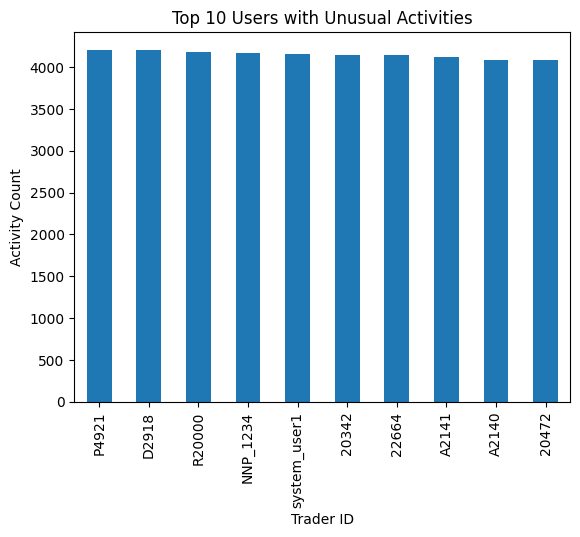

In [ ]:
import matplotlib.pyplot as plt

# Top 10 Users with Unusual Activities
top_users = summary.groupby('trader_id')['Count'].sum().nlargest(10)

# Plot top users
top_users.plot(kind='bar', title='Top 10 Users with Unusual Activities')
plt.xlabel('Trader ID')
plt.ylabel('Activity Count')
plt.show()


In [ ]:
# Top offenders: Identify users with the most unusual activities.

# Assuming 'summary' DataFrame from the previous code is available.
# If not, run the entire preceding code first.

# Top 10 Users with Unusual Activities
top_users = summary.groupby('trader_id')['Count'].sum().nlargest(10)

print("Top 10 Users with the Most Unusual Activities:")
top_users

Top 10 Users with the Most Unusual Activities:


,Count
trader_id,
P4921,4208
D2918,4199
R20000,4176
NNP_1234,4165
system_user1,4161
20342,4147
22664,4146
A2141,4125
A2140,4090


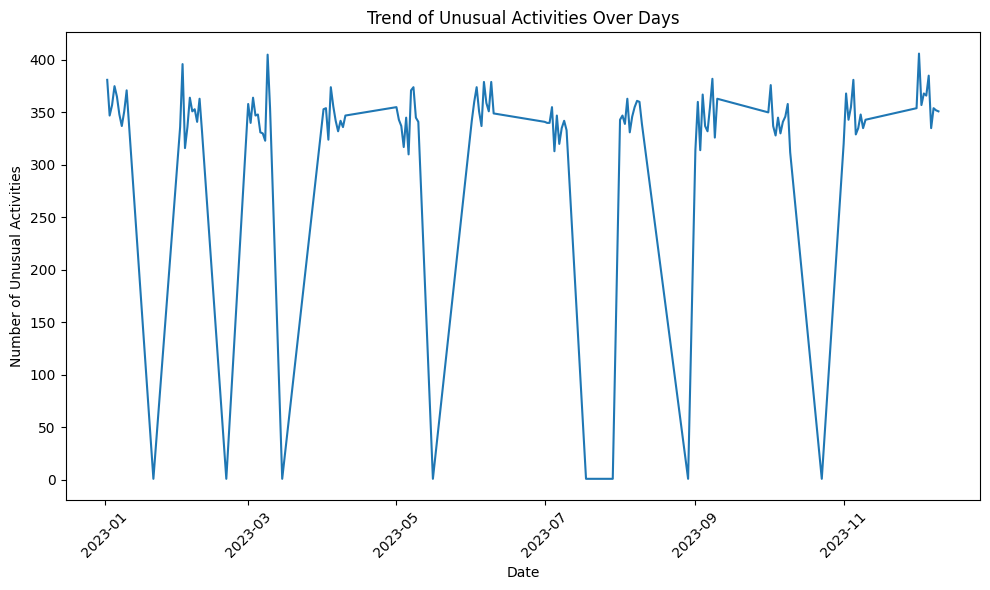

In [ ]:
# Trend analysis: Analyze activity trends over days or hours.

# Assuming 'summary' DataFrame from the previous code is available.
# If not, run the entire preceding code first.

import matplotlib.pyplot as plt

# Trend analysis over days
daily_trends = summary.groupby('trade_date')['Count'].sum()
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.plot(daily_trends.index, daily_trends.values)
plt.xlabel('Date')
plt.ylabel('Number of Unusual Activities')
plt.title('Trend of Unusual Activities Over Days')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Trend analysis over hours (requires extracting hour from 'trade_time')
# Assuming you have a 'trade_time' column with time information.
# Example:
# summary['trade_hour'] = summary['trade_time'].dt.hour  # If trade_time is datetime

# hourly_trends = summary.groupby('trade_hour')['Count'].sum()
# plt.plot(hourly_trends.index, hourly_trends.values)
# plt.xlabel('Hour of Day')
# plt.ylabel('Number of Unusual Activities')
# plt.title('Trend of Unusual Activities Over Hours')
# plt.show()

Geographical Insights (Cities/Countries with most unusual activities):
         city  country  Unusual_Activity_Count
0  Dusseldorf  Germany                   41503
1       Texas      USA                       6
2   Texas USA      USA                       6


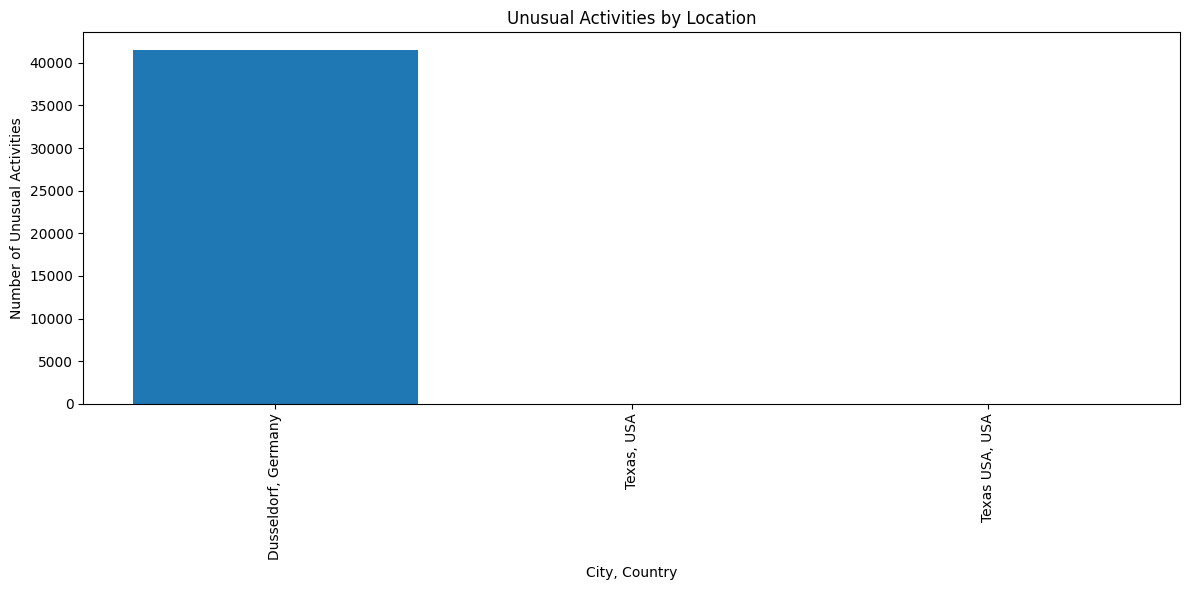

In [ ]:

# Geographical insights: Which cities/countries have the most unusual activities?

# Assuming 'unusual_activities' DataFrame from the previous code is available.
# If not, run the entire preceding code first.  Make sure you have city and country data.

# Check if 'city' and 'country' columns exist
if 'city' in unusual_activities.columns and 'country' in unusual_activities.columns:
    # Group by city and country and count unusual activities
    geo_insights = unusual_activities.groupby(['city', 'country']).size().reset_index(name='Unusual_Activity_Count')

    # Sort by count to find cities/countries with the most unusual activities
    geo_insights = geo_insights.sort_values('Unusual_Activity_Count', ascending=False)

    print("Geographical Insights (Cities/Countries with most unusual activities):")
    print(geo_insights)

    # Plotting for visualization (optional)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    plt.bar(geo_insights['city'] + ', ' + geo_insights['country'], geo_insights['Unusual_Activity_Count'])
    plt.xlabel("City, Country")
    plt.ylabel("Number of Unusual Activities")
    plt.title("Unusual Activities by Location")
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'city' and/or 'country' columns not found in the DataFrame.")
    print("Please ensure your dataset includes location information.")

In [ ]:
# Step-wise Time Estimates (in hours)
task_time_estimates = {
    "data_loading": 0.5,           # Load CSV file and handle missing data
    "data_cleaning": 1.5,          # Clean and convert data to correct format
    "time_extraction": 1.0,        # Extract date and time components
    "flagging_trades": 1.0,        # Define working hours and filter trades
    "grouping_counting": 1.0,      # Group data and calculate counts
    "report_generation": 0.5,      # Save and export the report
    "testing_validation": 2.0,     # Test correctness and validate data
    "documentation": 1.0,          # Write comments and basic documentation
    "debugging_tweaks": 1.0,       # Debug and handle small issues
}

# Step 1: Calculate Total Hours
total_hours = sum(task_time_estimates.values())

# Step 2: Convert Hours to Days (8 work hours per day)
work_hours_per_day = 8
estimated_days = total_hours / work_hours_per_day

# Step 3: Print Time Estimate Breakdown
print("Implementation Time Estimates (per task):\n")
for task, hours in task_time_estimates.items():
    print(f"{task.replace('_', ' ').title()}: {hours} hours")

print("\nSummary:")
print(f"Total Estimated Time: {total_hours:.1f} hours")
print(f"Estimated Duration: {estimated_days:.1f} days (for one developer)")


Implementation Time Estimates (per task):

Data Loading: 0.5 hours
Data Cleaning: 1.5 hours
Time Extraction: 1.0 hours
Flagging Trades: 1.0 hours
Grouping Counting: 1.0 hours
Report Generation: 0.5 hours
Testing Validation: 2.0 hours
Documentation: 1.0 hours
Debugging Tweaks: 1.0 hours

Summary:
Total Estimated Time: 9.5 hours
Estimated Duration: 1.2 days (for one developer)
